# Visualizing Soccer Data


## Introduction

Visualizing soccer data can be incredibly useful for gaining insights and understanding patterns within the game. By representing data in visual formats such as charts, graphs, and maps, we can easily identify trends, analyze player performance, and make informed decisions. Whether it's tracking player movements, analyzing team formations, or evaluating match statistics, visualizations provide a clear and intuitive way to interpret complex data. With the ability to visualize soccer data, coaches, analysts, and fans can uncover valuable information that can lead to improved strategies, player development, and overall performance on the field. DataBallPy has some build in methods to create visualizations, although there is room for improvement. 

## Plotting a Soccer Pitch

Everything looks better when it is plotted on a soccer pitch. The `plot_soccer_pitch` function in DataBallPy allows you to create a customizable soccer pitch that can be used to visualize player movements, shot locations, and other match data. The function takes several parameters that allow you to customize the appearance of the pitch, such as the field dimensions, line colors, and background color.

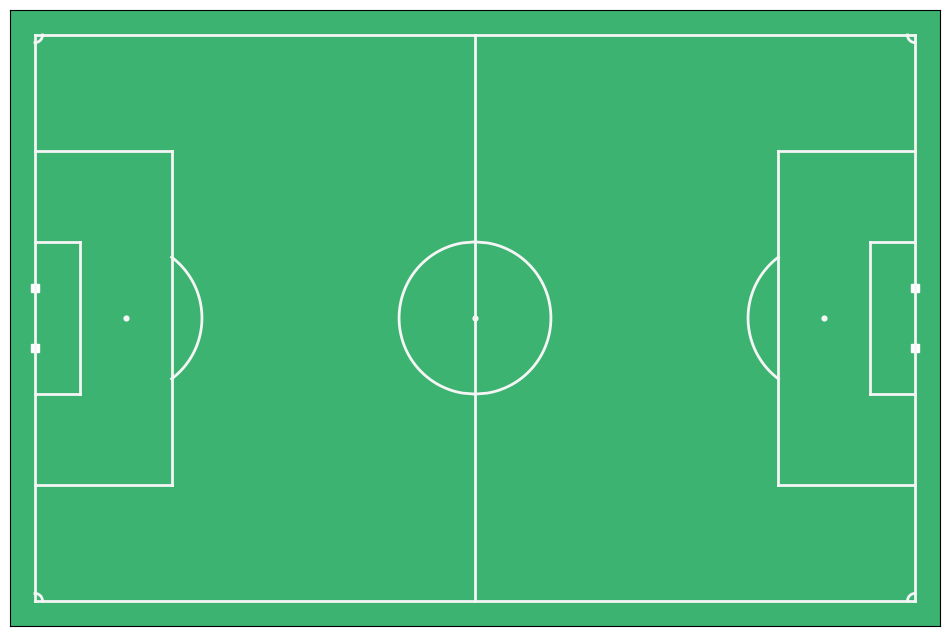

In [1]:
import matplotlib.pyplot as plt
from databallpy.visualize import plot_soccer_pitch

fig, ax = plot_soccer_pitch()
plt.show()

### Parameters

- **field_dimen** (tuple, optional): The dimensions of the soccer field in meters (length, width). Defaults to (106.0, 68.0).

- **pitch_color** (str, optional): The background color of the pitch. Defaults to "mediumseagreen".

- **linewidth** (int, optional): The width of the lines on the pitch. Defaults to 2.

- **markersize** (int, optional): The size of the markers used to plot player positions. Defaults to 20.

- **fig** (matplotlib.figure.Figure, optional): The figure object to plot on. Defaults to None.

- **ax** (matplotlib.axes.Axes, optional): The axes object to plot on. Defaults to None.


### Returns

- **fig** (matplotlib.figure.Figure): The figure object.

- **ax** (matplotlib.axes.Axes): The axes object containing the pitch.


## Plotting Events

Plotting the number and location of specific events on the pitch can provide a first look at the data. The `plot_events` function in DataBallPy allows you to visualize events such as passes, shots, and tackles on the soccer pitch.



```python
from databallpy import get_match, get_open_match

match = get_match(
  tracking_data_loc="../data/tracking_data.dat",
  tracking_metadata_loc="../data/tracking_metadata.xml",
  tracking_data_provider="tracab"
  event_data_loc="../data/event_data_f24.xml",
  event_metadata_loc="../data/event_metadata_f7.xml",
  event_data_provider="opta",
)

# or get the open match provided by Metrica

match = get_open_match()
```

```{note}
The current supported tracking data providers are:

- Tracab
- Metrica
- Inmotio

The current supported event data provider are:
- Opta
- Metrica
- Instat

If you wish to use a different provider that is not listed here, please open an issue [here](https://github.com/Alek050/databallpy/issues)
```

In [2]:
from databallpy import get_saved_match
import os

match = get_saved_match(name="synced_match", path=os.path.join(os.getcwd(), "../saved_matches"))

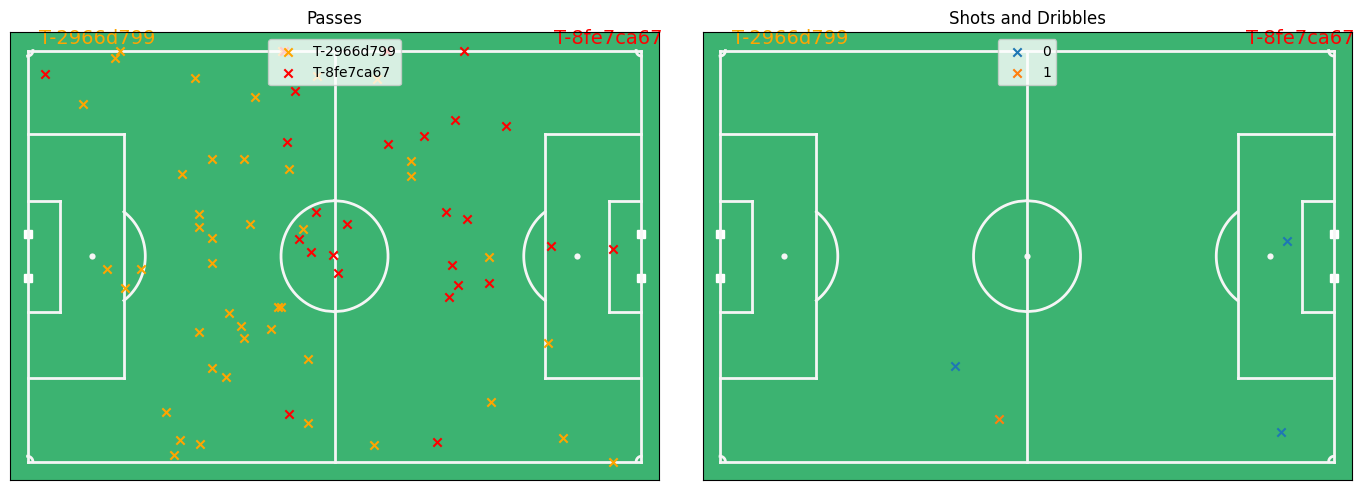

In [3]:
from databallpy.visualize import plot_events

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
fig, ax1 = plot_soccer_pitch(field_dimen=match.pitch_dimensions, fig=fig, ax=ax1)
fig, ax2 = plot_soccer_pitch(field_dimen=match.pitch_dimensions, fig=fig, ax=ax2)
fig, ax1 = plot_events(
    match, events=["pass"], fig=fig, ax=ax1, title="Passes", color_by_col="team_id"
)
fig, ax2 = plot_events(
    match, events=["dribble", "shot"], fig=fig, ax=ax2, title="Shots and Dribbles", color_by_col="outcome"
)
fig.tight_layout()
plt.show()

### Parameters

- **match** (databallpy.match.Match): The match object containing the event data.

- **events** (list[str], optional): The types of databallpy events to plot (e.g., "pass", "shot", "dribble"). Defaults to [], which plots all events.

- **outcome** (int | None, optional): Filter events by outcome (0 for unsuccessful, 1 for successful). Defaults to None, which plots all events.

- **player_ids** (list[int], optional): The player IDs to plot events for. Defaults to [], which plots events for all players.

- **team_id** (int | str | None, optional): The team ID to plot events for. Defaults to None, which plots events for both teams.

- **fig** (matplotlib.figure.Figure, optional): The figure object to plot on. Defaults to None.

- **ax** (matplotlib.axes.Axes, optional): The axes object to plot on. Defaults to None.

- **color_by_col** (str, optional): The column to use for coloring the events. Defaults to None, which does not color the events.

- **team_colors** (list[str], optional): The colors to use for each team. Defaults to ["organge", "red"]. 

- **title** (str | None, optional): The title of the plot. Defaults to None.


### Returns

- **fig** (matplotlib.figure.Figure): The figure object.

- **ax** (matplotlib.axes.Axes): The axes object containing the pitch.


## Plotting the Tracking Data

You migth be interested in a specific situation and want to see how all players are located. For this you can use the `plot_tracking_data` function.

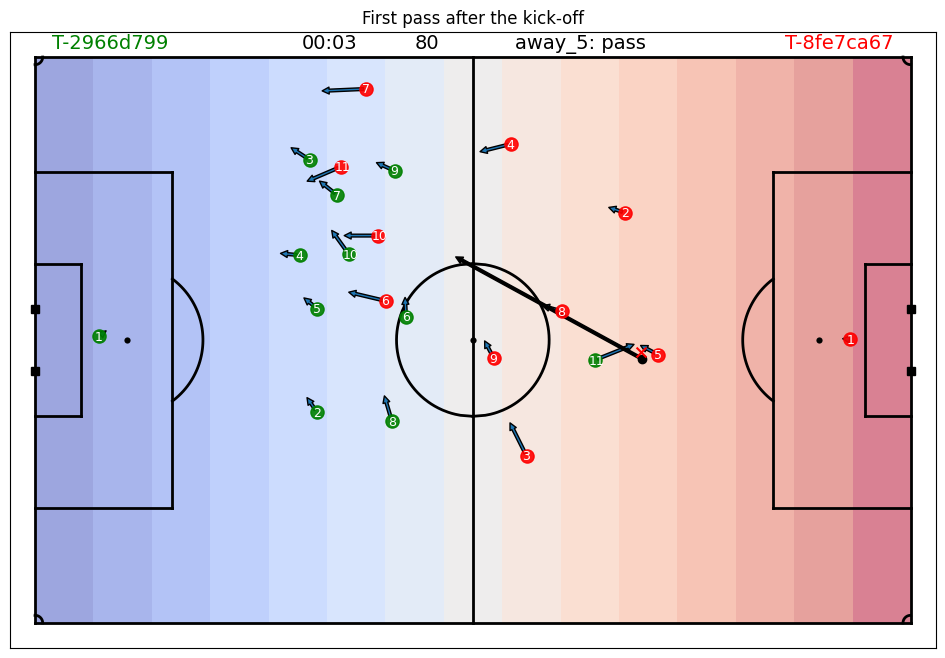

In [4]:
from databallpy.features import add_velocity
from databallpy.visualize import plot_tracking_data
import numpy as np

match.tracking_data = add_velocity(
    match.tracking_data,
    column_ids=match.home_players_column_ids() + match.away_players_column_ids(),
    frame_rate=match.frame_rate,
    max_velocity=13.0
    )

second_pass_id = match.event_data.loc[match.event_data["databallpy_event"]=="pass", "event_id"].iloc[1]
idx = match.tracking_data[match.tracking_data["event_id"]==second_pass_id].index[0]

x_grid, _ = np.meshgrid(np.linspace(0, 1, 15), np.linspace(0, 1, 10))

fig, ax = plot_soccer_pitch(field_dimen=match.pitch_dimensions, pitch_color="white")
fig, ax = plot_tracking_data(
    match, 
    idx, 
    fig=fig, 
    ax=ax, 
    events=["pass"],
    title="First pass after the kick-off",
    add_velocities=True,
    variable_of_interest=match.tracking_data.loc[idx, "frame"],
    heatmap_overlay=x_grid,
    overlay_cmap="coolwarm",
    )

### Parameters

#### Positional Arguments

- **match** (databallpy.match.Match): The match object containing the tracking data.

- **idx** (int): The index of the frame to plot.

- **team_colors** (list[str], optional): The colors to use for each team. Defaults to ["green", "red"].

#### Keyword Arguments

- **fig** (matplotlib.figure.Figure, optional): The figure object to plot on. Defaults to None.

- **ax** (matplotlib.axes.Axes, optional): The axes object to plot on. Defaults to None.

- **title** (str, optional): The title of the plot. Defaults to None.

- **events** (list[str], optional): Whether to show player numbers on the plot. Defaults to False.
Note that this only works if the tracking and event data has been synchronised. The list should contain the databallpy events to show on the plot. It will only show the event is the event is happening at that frame.

- **variable_of_interest** (any, optional): This variable will be plotted on top of the plot. This can be any variable you calculated yourself. For instance, the frame number as is show in the example above. Defaults to None.

- **add_player_possession** (bool, optional): Whether to add a marker to the player in possession of the ball. Defaults to False. Note that this requires the tracking data to have a column `"player_possession"` which can be obtained by the `get_individual_player_possessions_and_duels()` function.

- **heatmap_overlay** (np.ndarray | None, optional): A 2D heatmap to overlay on the tracking data. Defaults to None.

- **overlay_cmap** (str | matplotlib.Colormap, optional): The colormap to use for the heatmap overlay. Defaults to "viridis".

### Returns

- **fig** (matplotlib.figure.Figure): The figure object.

- **ax** (matplotlib.axes.Axes): The axes object containing the pitch.

## Saving a Video of Tracking data

Similar to the `plot_tracking_data` function, you can also save a video of the tracking data. This can be done with the `save_tracking_video` function. The functions are almost identical, but the `save_tracking_video` function will save the video to a file and thus take a little longer to run.

```{important}
Saving a video clip of the data makes use of FFMPEG. Make sure you have FFMPEG installed on your system. You can download it from [here](https://ffmpeg.org/download.html) and add it to your path.
```

```python
from databallpy.visualize import save_tracking_video
from databallpy.features.pitch_control import get_pitch_control


heatmap_overlay = get_pitch_control(
    match.tracking_data.loc[0:100],
    match.pitch_dimensions,
    )

save_tracking_video(
    match,
    start_idx=0,
    end_idx=100,
    save_folder=os.path.join(os.getcwd(), "static"),
    title="Tracking Video Example",
    events=["pass"],
    variable_of_interest=match.tracking_data.loc[0:100, "frame"],
    add_velocities=True,
    heatmap_overlay=heatmap_overlay,
    overlay_cmap="coolwarm",
    verbose=False,
)
```

In [6]:
# from databallpy.visualize import save_tracking_video
# from databallpy.features.pitch_control import get_pitch_control


# heatmap_overlay = get_pitch_control(
#     match.tracking_data.loc[0:100],
#     match.pitch_dimensions,
#     )

# save_tracking_video(
#     match,
#     start_idx=0,
#     end_idx=100,
#     save_folder=os.path.join(os.getcwd(), "static"),
#     title="Tracking Video Example",
#     events=["pass"],
#     variable_of_interest=match.tracking_data.loc[0:100, "frame"],
#     add_velocities=True,
#     heatmap_overlay=heatmap_overlay,
#     overlay_cmap="coolwarm",
#     verbose=False,
# )

from IPython.display import Video
Video(os.path.join(os.getcwd(), "../static", "Tracking Video Example.mp4"), embed=True, width=800)

### Parameters

#### Positional Arguments

- **match** (databallpy.match.Match): The match object containing the tracking data.

- **start_idx** (int): The start index of the tracking data video.

- **end_idx** (int): The end index of the tracking data video.

- **save_folder** (str): The folder to save the video to.

#### Keyword Arguments

- **title** (str, optional): The title of the video. Defaults to "test_clip".

- **team_colors** (list[str], optional): The colors to use for each team. Defaults to ["green", "red"].

- **events** (list[str], optional): List of the events to show in the video. Defaults to [].
Note that this only works if the tracking and event data has been synchronised. The list should contain the databallpy events to show in the vidoe. It will only show the event is the event is happening at that frame.

- **variable_of_interest** (pd.Series | list, optional): This variable will be plotted on top of the plot. This can be any variable you calculated yourself. For instance, the frame number as is show in the example above. Defaults to None.

- **add_player_possession** (bool, optional): Whether to add a marker to the player in possession of the ball. Defaults to False. Note that this requires the tracking data to have a column `"player_possession"` which can be obtained by the `get_individual_player_possessions_and_duels()` function.

- **add_velocities** (bool, optional): Whether to add player velocities to the video. Defaults to False.

- **heatmap_overlay** (np.ndarray | None, optional): A n_frames by 2D heatmap to overlay on the tracking data. Defaults to None.

- **overlay_cmap** (str | matplotlib.Colormap, optional): The colormap to use for the heatmap overlay. Defaults to "viridis".

````{margin}
```{warning}
Adding a heatmap overlay to the video will increase the time it takes to create the video. Make sure to set the `verbose` parameter to True to see the progress of the video creation.
```
````

- **verbose** (bool, optional): Whether to print the progress of the video creation. Defaults to True.

## Conclusion

Visualizing soccer data can provide valuable insights into player performance, team tactics, and match analysis. By using the `plot_soccer_pitch`, `plot_events`, and `plot_tracking_data` functions in DataBallPy, you can create customized visualizations that help you understand the game better. Whether you're analyzing player movements, shot locations, or tracking data, visualizations can help you identify patterns, trends, and opportunities for improvement. By leveraging the power of data visualization, you can gain a competitive edge in soccer analysis and make more informed decisions on and off the field.

If you have any improvements or suggestions for the visualization functions in DataBallPy, feel free to contribute to the project on [GitHub](https://www.Github.com/Alek050/databallpy). Your feedback is valuable in helping us improve the library and provide better tools for soccer analysis and visualization.